<a href="https://colab.research.google.com/github/viniciusrpb/cic0193_machinelearning/blob/main/cap9_3_alexnet_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 9

## 9.3. Criando uma AlexNet (incompleto)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Activation,Flatten,Conv2D,BatchNormalization,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.metrics import classification_report
from keras.datasets import cifar10
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

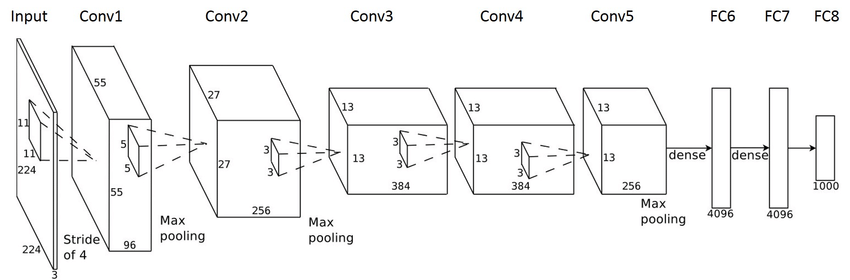

In [ ]:
(trainX,trainY), (testX,testY) = cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


AlexNet


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(trainX,trainY,test_size=0.3,random_state=43)

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(testY)

# falta converter os labels para atributos categóricos

In [ ]:
model = Sequential()

model.add(layers.experimental.preprocessing.Resizing(224,224,interpolation="bilinear",input_shape=(224,224,3)))
model.add(Conv2D(filters=96,padding="same",strides=4,kernel_size=(11,11)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=256,padding="same",kernel_size=(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=384,padding="same",kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=384,padding="same",kernel_size=(3,3)))
model.add(Activation('relu'))

model.add(Conv2D(filters=256,padding="same",kernel_size=(3,3)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation("relu"))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation("relu"))

#model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation("softmax"))

In [ ]:
sgd = SGD(learning_rate=0.1)

model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=10)

Epoch 1/10


ValueError: ignored